In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [38]:
df = pd.read_csv('divorce.csv',delimiter=';')

In [39]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [40]:
df.shape

(170, 55)

In [47]:
df['Class'].value_counts()

Class
0    86
1    84
Name: count, dtype: int64

In [48]:
df.columns.values

array(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8',
       'Atr9', 'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15',
       'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22',
       'Atr23', 'Atr24', 'Atr25', 'Atr26', 'Atr27', 'Atr28', 'Atr29',
       'Atr30', 'Atr31', 'Atr32', 'Atr33', 'Atr34', 'Atr35', 'Atr36',
       'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41', 'Atr42', 'Atr43',
       'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50',
       'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'], dtype=object)

In [50]:
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,-0.023376
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,-0.022875
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,-0.018635
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,-0.004061
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,-0.039466
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.068489
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,-0.006642
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.014903
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,-0.026821
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,-0.045021


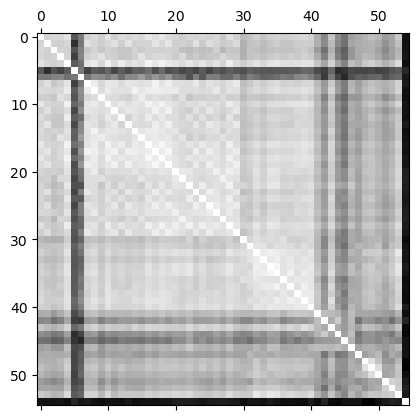

In [52]:
plt.matshow(df.corr(),cmap='grey')
plt.show()

In [53]:
X = df.iloc[ :, :-1]
Y = df.iloc[ :, -1]

In [54]:
X.shape

(170, 54)

In [55]:
Y.shape

(170,)

In [58]:
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.4, random_state=10)

In [59]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(102, 54) (102,) (68, 54) (68,)
